虽然RL_brain.py和run_MountainCar.py中都设置了固定的random seed，但是两个网络训练的过程显然在一开始(episode0)时就 已经走到了不同的state-action中去，这时prioritized还根本没有发生，所以问题应该是他们在训练时，env, greedy等地方用了不同的随机数。尤其是若epsiode为0，DQN with prioritized replay就随机走到了比natural DQN的ep0更漫长的训练过程中的话，那对于这样单一的例子，由于prio replay DQN在ep0得到了更多的训练，所以没有办法说明它outperform是due to a more reasonable algorithm. 只能通过大量的随机试验才可能进行论证。

那么如何才能复用同一串random number呢，猜想random.seed固定后会导致程序runtime是每次会被调用的是同一串随机数序列，那么只要把natural DQN和prio replay DQN分开写在两个py中分别执行，应该可以在episode0中看到同样的更为相近的steps等。相当于在prioritized生效前，我们赋予了它们完全相同的实验环境，初始state,action和随机策略。在此基础上我们可以得出叫严谨的结论，后续的曲线变化，是由于prioritized replay的蝴蝶效应，它能够更有效的更有针对性地抽取大reward exp来学习。

there are three fixed random seeds in these two files:

In [ ]:
'''
np.random.seed(1) #比如sampling for minibatch, greedy while choosing action
tf.set_random_seed(1) #比如build net中神经元参数initializer的随机性

env.seed(21) #比如环境中初始状态和动作
'''

In [2]:
import numpy as np
np.random.seed(1)

random_series=[]
for i in range (20):
    action = np.random.randint(0, 4)
    random_series.append(action)
print(random_series)


[1, 3, 0, 0, 3, 1, 3, 1, 3, 0, 0, 1, 0, 3, 1, 0, 2, 1, 2, 0]


[1, 3, 0, 0, 3, 1, 3, 1, 3, 0, 0, 1, 0, 3, 1, 0, 2, 1, 2, 0]

In [3]:
random_series=[]
for i in range (20):
    action = np.random.randint(0, 4)
    random_series.append(action)
print(random_series)

[2, 1, 2, 0, 3, 0, 2, 0, 1, 2, 2, 0, 3, 3, 1, 1, 3, 2, 0, 2]


In [4]:
random_series=[]
for i in range (20):
    action = np.random.randint(0, 4)
    random_series.append(action)
print(random_series)

[1, 1, 1, 3, 3, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 3, 3, 2, 1, 0]


In [5]:
np.random.seed(1)

random_series=[]
for i in range (20):
    action = np.random.randint(0, 4)
    random_series.append(action)
print(random_series)

[1, 3, 0, 0, 3, 1, 3, 1, 3, 0, 0, 1, 0, 3, 1, 0, 2, 1, 2, 0]


run these blocks above. We found the necessary condition for reprinting the same array is that:

np.random.seed(1)  needs to be executed again. No matter by executing this line of code again during runtime Or restarting the python program

重写那俩py file太繁琐，先改env seed看看效果。

Plot multiple graphs seperately

Ref:https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
x=np.array([0,1,2,3,4,5,6,7,8,9])
x1=np.arange(0, math.pi*2, 0.05)
rand_ints=np.random.rand(1,10)    # 1x10
y1=[k for k in rand_ints[0]]
y2=np.sin(x)

print(x[0])


0


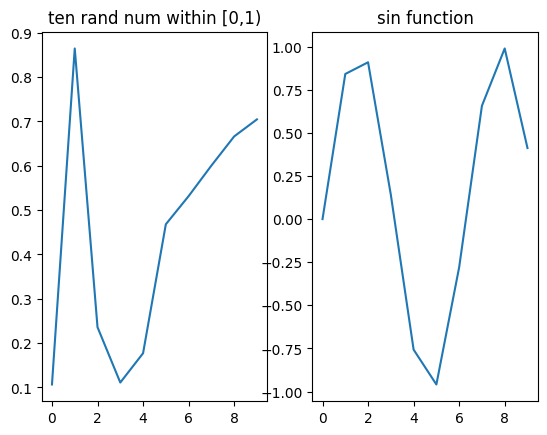

In [5]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)

# For y1 Function
axis[0].plot(x, y1)      #注意如果subplot是2x2一共四个，那么就有两个dimension，这里变axis[0,0]
axis[0].set_title("ten rand num within [0,1)")

# For y2 Function
axis[1].plot(x, y2)
axis[1].set_title("sin function")

# Combine all the operations and display
plt.show()

Plot multiple graphs in a single figure: subplots()